In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
import umap.umap_ as umap 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import FastICA



2022-12-12 11:57:24.288594: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
path = "data/"

data=pd.read_csv(path+'A2_data.csv')
X,y= data.loc[:, data.columns != 'class'], data['class']

print(f'There are {X.shape[0]} samples of each {X.shape[1]} features')

#Data includes some identifiers lets remove those 
ID_parameters= ['field_ID','MJD','plate']
for ID in ID_parameters:
    X=X.loc[:, X.columns != ID]

#We know that a flux should be positive so remove the datapoint which does not have that
#This datapoint has value -9999 so not a detection but a instrumentation issue
I_remove=np.where(X['u']<0)[0]
X,y = X.drop(I_remove),y.drop(I_remove)
X,y=X.reset_index(drop=True),y.reset_index(drop=True)
data_processed= X.join(y)
data_processed.to_csv(path+'A2_data_preprocessed.csv', index=False)

print(f'There are final {X.shape[0]} samples of now {X.shape[1]} features')

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)
X_train,y_train=X_train.reset_index(drop=True),y_train.reset_index(drop=True)
X_test,y_test=X_test.reset_index(drop=True),y_test.reset_index(drop=True)


print(f'There are {X_train.shape[0]} training samples of each {X_train.shape[1]} features')

There are 100000 samples of each 11 features
There are final 99999 samples of now 8 features
There are 66999 training samples of each 8 features


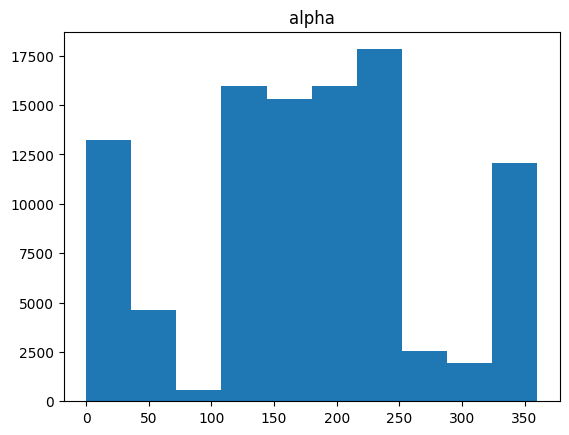

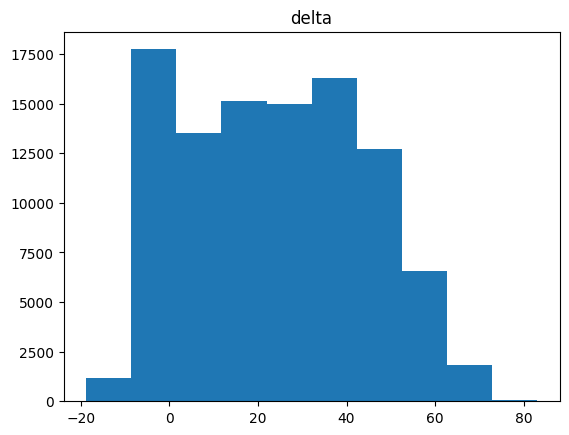

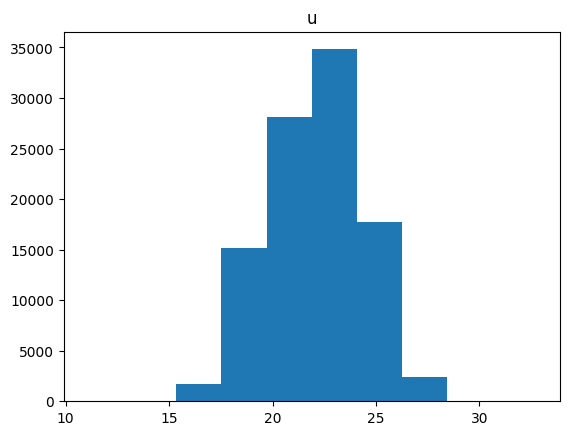

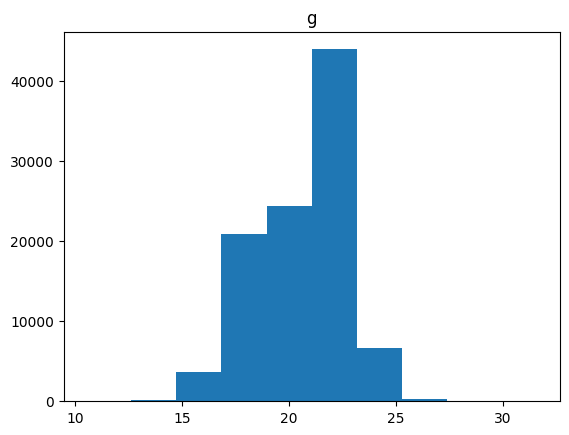

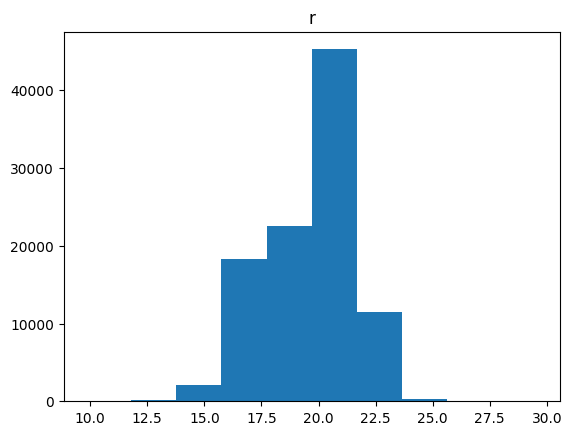

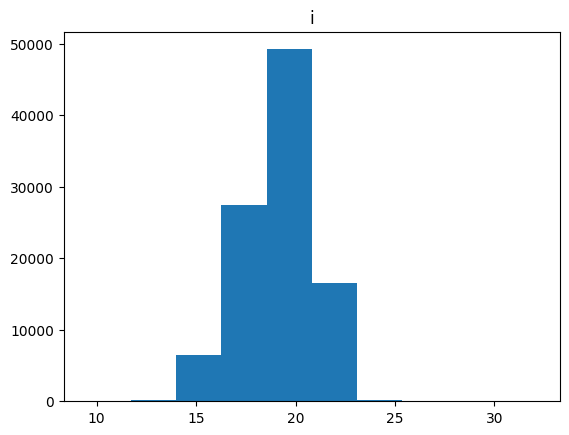

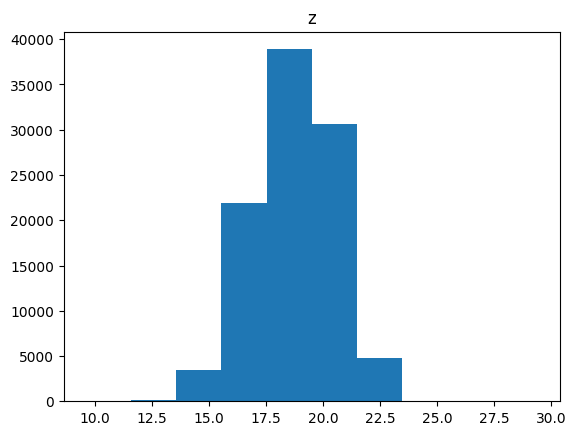

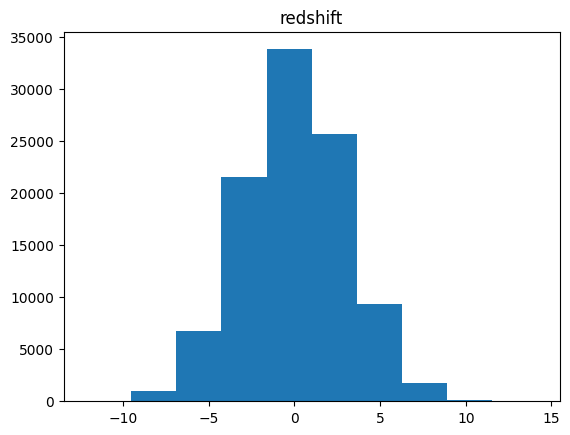

In [5]:
for C in X.columns:
    plt.hist(X[C])
    plt.title(C)
    plt.show()

In [6]:
#Visualise the models
def visualise_components(model_name, y, finaldim):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Component 1', fontsize = 15)
    ax.set_ylabel('Component 2', fontsize = 15)
    ax.set_title(f'2 component {model_name}', fontsize = 20)
    targets = np.unique(y)
    colors = ['r', 'g', 'b','k','y']
    for target, color in zip(targets,colors):
        indicesToKeep = finaldim['class'] == target
        ax.scatter(finaldim.loc[indicesToKeep, 'component 1']
                , finaldim.loc[indicesToKeep, 'component 2']
                , c = color
                , s = 10
                , marker = '.')
    ax.legend(targets, fontsize=15)
    ax.grid()
    plt.savefig(f'plots/{model_name}.pdf')
    plt.show()

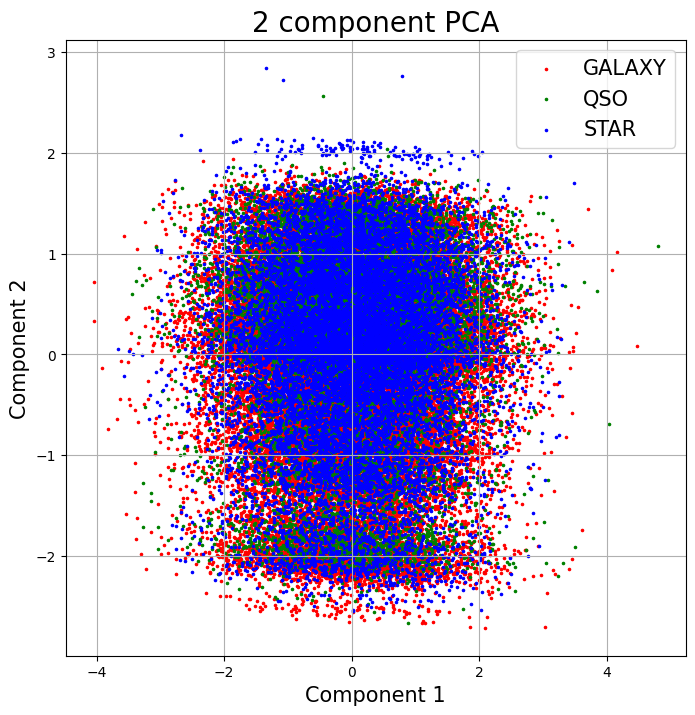

,component 3,component 4,component 1,component 2,class
0,-0.284266,-1.751454,0.027549,-0.007039,GALAXY
1,-0.041236,-2.064852,2.169773,0.137858,GALAXY
2,-1.260059,-2.210483,-0.374862,0.427590,GALAXY
3,-3.205909,-0.486546,-1.063459,0.181401,GALAXY
4,-1.111073,-0.960227,0.386129,-0.929050,GALAXY
...,...,...,...,...,...
66994,-0.603015,0.934832,-0.193193,0.086714,QSO
66995,4.080481,0.947247,-0.755041,1.117722,GALAXY
66996,-0.105271,0.370783,-0.104969,0.566035,STAR
66997,4.380811,-1.490040,-1.006848,0.450174,GALAXY


In [7]:
x = X_train
x = StandardScaler().fit_transform(x)


# Use PCA to reduce to two dimensions
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x)
principal = pd.DataFrame(data = principalComponents,columns = ['component 3', 'component 4','component 1', 'component 2'])
finalPca = pd.concat([principal, y_train], axis = 1)

visualise_components('PCA', y_train, finalPca)

finalPca


In [78]:
params_list= [{
    "n_neighbors": 2,
    "min_dist": 0.3,
    "metric": "correlation", 
    "init": "random"
},{
    "n_neighbors": 5,
    "min_dist": 0.3,
    "metric": "correlation", 
    "init": "random"
},{
    "n_neighbors": 10,
    "min_dist": 0.3,
    "metric": "correlation", 
    "init": "random"
},{
    "n_neighbors": 50,
    "min_dist": 0.3,
    "metric": "correlation", 
    "init": "random"
},{
    "n_neighbors": 100,
    "min_dist": 0.3,
    "metric": "correlation", 
    "init": "random"
},{
    "n_neighbors": 200,
    "min_dist": 0.3,
    "metric": "correlation", 
    "init": "random"
}

] #(0.0, 0.1, 0.25, 0.5, 0.8, 0.99)

In [85]:
params_list=[{
    "n_neighbors": 10,
    "min_dist": 0.0,
    "metric": "correlation", 
    "init": "random"
},{
    "n_neighbors": 10,
    "min_dist": 0.1,
    "metric": "correlation", 
    "init": "random"
},{
    "n_neighbors": 10,
    "min_dist": 0.25,
    "metric": "correlation", 
    "init": "random"
},{
    "n_neighbors": 10,
    "min_dist": 0.4,
    "metric": "correlation", 
    "init": "random"
},{
    "n_neighbors": 10,
    "min_dist": 0.45,
    "metric": "correlation", 
    "init": "random"
},{
    "n_neighbors": 10,
    "min_dist": 0.5,
    "metric": "correlation", 
    "init": "random"
}]

In [87]:
params_list=[{
    "n_neighbors": 10,
    "min_dist": 0.3,
    "metric": "correlation", 
    "init": "random"
},{
    "n_neighbors": 10,
    "min_dist": 0.3,
    "metric": "euclidean", 
    "init": "random"
},{
    "n_neighbors": 10,
    "min_dist": 0.3,
    "metric": "minkowski", 
    "init": "random"
},{
    "n_neighbors": 10,
    "min_dist": 0.3,
    "metric": "mahalanobis", 
    "init": "random"
},{
    "n_neighbors": 10,
    "min_dist": 0.3,
    "metric": "jaccard", 
    "init": "random"
},{
    "n_neighbors": 10,
    "min_dist": 0.3,
    "metric": "chebyshev", 
    "init": "random"
}]

In [11]:
params_list=[{
    "n_neighbors": 10,
    "min_dist": 0.3,
    "metric": "correlation", 
    "init": "random"
}]
for params in params_list:
    print(params['n_neighbors'])
    x = X_train
    x = StandardScaler().fit_transform(x)
    reducer = umap.UMAP(n_components=3,n_neighbors=params['n_neighbors'],min_dist=params['min_dist'],metric=params['metric'],init=params['init'])
    UmapComponents = reducer.fit_transform(x)
    UmapDf = pd.DataFrame(data = UmapComponents,columns = ['component 1', 'component 2','component 3'])
    finalUmapDf3 = pd.concat([UmapDf, y_train], axis = 1)

    visualise_components(f"UMAP_with", y_train, finalUmapDf3)




    finalUmapDf3.to_csv('Umap_reduced_data_with_3.csv', index=False)

10


NameError: name 'finalUmapDf' is not defined

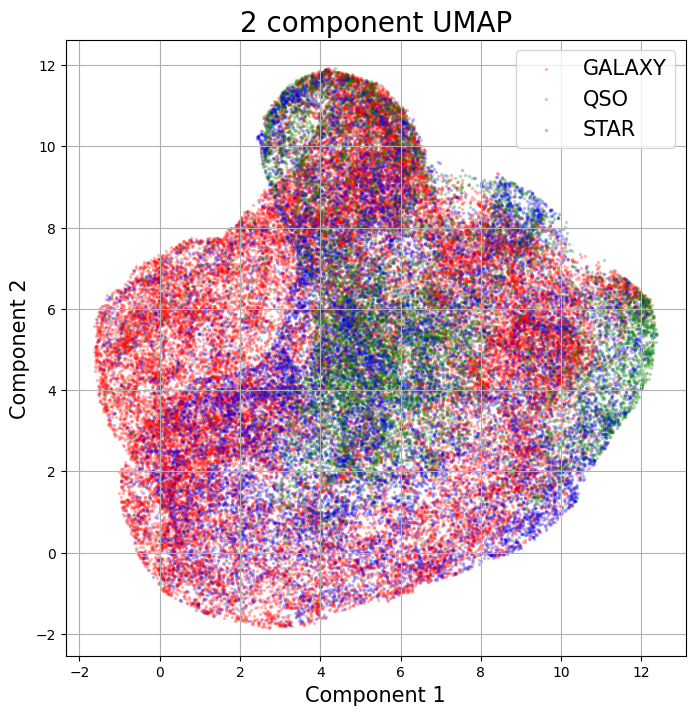

In [13]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_title(f'2 component {"UMAP"}', fontsize = 20)
targets = np.unique(y)
colors = ['r', 'g', 'b','k','y']
for target, color in zip(targets,colors):
    indicesToKeep = finalUmapDf3['class'] == target
    ax.scatter(finalUmapDf3.loc[indicesToKeep, 'component 1']
            , finalUmapDf3.loc[indicesToKeep, 'component 2']
            , c = color
            , s = 10
            , marker = '.', alpha=0.2)
ax.legend(targets, fontsize=15)
ax.grid()
#plt.savefig(f'plots/UMAP_best.pdf')
plt.show()

In [92]:
x = X_train 
reducer = umap.UMAP(n_neighbors=10,n_components=1,min_dist=0.3,
                      metric='correlation',init='random')
UmapComponents = reducer.fit_transform(x)
UmapDf = pd.DataFrame(data = UmapComponents,columns = ['component 1', 'component 2'])
finalUmapDf = pd.concat([UmapDf, y_train], axis = 1)

visualise_components('1', y_train, finalUmapDf)
finalUmapDf

finalUmapDf.to_csv('Umap_reduced_data.csv', index=False)

ValueError: Shape of passed values is (66999, 1), indices imply (66999, 2)

ValueError: Plotting is currently only implemented for 2D embeddings

In [52]:
#pd.concat([UmapDf, y_train], axis = 1)
print(len(UmapDf))
print(len(y_train))
np.where(y_train.isnull())

66999
66999


(array([], dtype=int64),)

In [14]:
params_list=[{
    'perplexity' : 2 ,
    'early_exaggeration' : 12.0 ,
    'metric': 'euclidean'
},{
    'perplexity' : 5 ,
    'early_exaggeration' : 12.0 ,
    'metric': 'euclidean'
},{
    'perplexity' : 30 ,
    'early_exaggeration' : 12.0 ,
    'metric': 'euclidean'
},{
    'perplexity' : 50 ,
    'early_exaggeration' : 12.0 ,
    'metric': 'euclidean'
},{
    'perplexity' : 100 ,
    'early_exaggeration' : 12.0 ,
    'metric': 'euclidean'
}

]

In [15]:
# Use T-SNE to reduce to two dimensions
for params in params_list:
    x = X_train
    tsne = TSNE(n_components=2, verbose=1, perplexity=params['perplexity'], early_exaggeration=params['early_exaggeration'], metric=params['metric'])
    tsneComponents = tsne.fit_transform(x)
    tsneDf = pd.DataFrame(data = tsneComponents,columns = ['component 1', 'component 2'])
    finalTsneDf = pd.concat([tsneDf, y_train], axis = 1)
    finalTsneDf

    visualise_components(f"T-SNE_perplex{params['perplexity']}", y_train, finalTsneDf)

[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 66999 samples in 0.076s...
[t-SNE] Computed neighbors for 66999 samples in 1.181s...
[t-SNE] Computed conditional probabilities for sample 1000 / 66999
[t-SNE] Computed conditional probabilities for sample 2000 / 66999
[t-SNE] Computed conditional probabilities for sample 3000 / 66999
[t-SNE] Computed conditional probabilities for sample 4000 / 66999
[t-SNE] Computed conditional probabilities for sample 5000 / 66999
[t-SNE] Computed conditional probabilities for sample 6000 / 66999
[t-SNE] Computed conditional probabilities for sample 7000 / 66999
[t-SNE] Computed conditional probabilities for sample 8000 / 66999
[t-SNE] Computed conditional probabilities for sample 9000 / 66999
[t-SNE] Computed conditional probabilities for sample 10000 / 66999
[t-SNE] Computed conditional probabilities for sample 11000 / 66999
[t-SNE] Computed conditional probabilities for sample 12000 / 66999
[t-SNE] Computed conditional probabilities for samp

KeyboardInterrupt: 

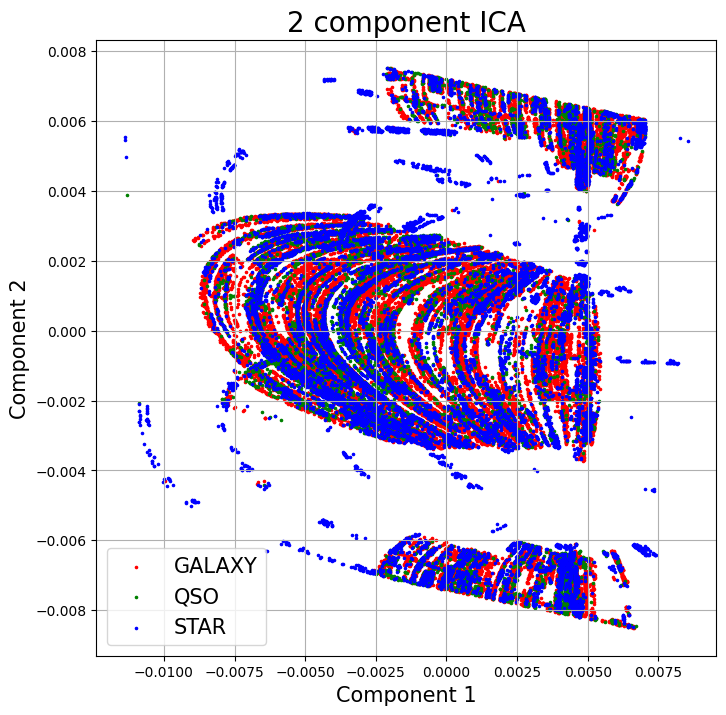

In [16]:
#Try ICA

transformer = FastICA(n_components=2,whiten='unit-variance')
icacomponents = transformer.fit_transform(x)
icaDf= pd.DataFrame(data = icacomponents,columns = ['component 1', 'component 2'])
icaDf = pd.concat([icaDf, y_train], axis = 1)
icaDf

visualise_components('ICA', y_train, icaDf)

False

3


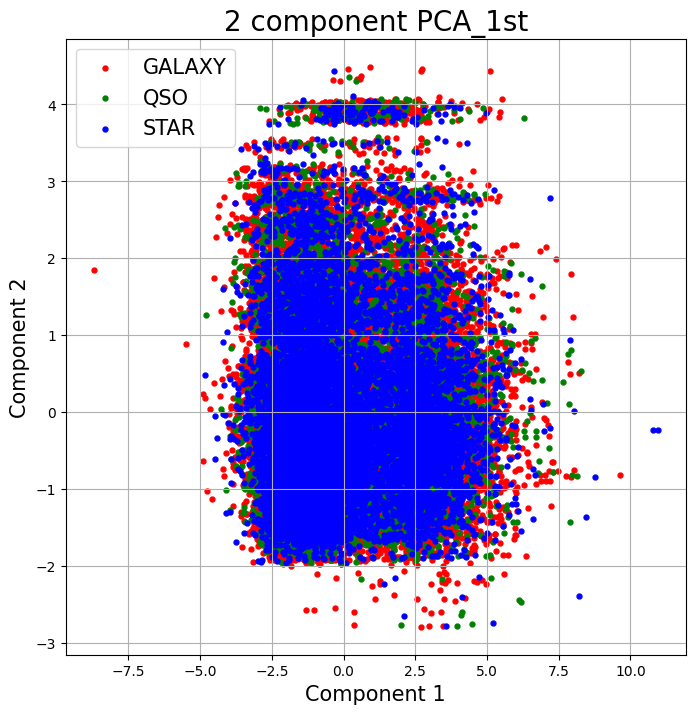

3


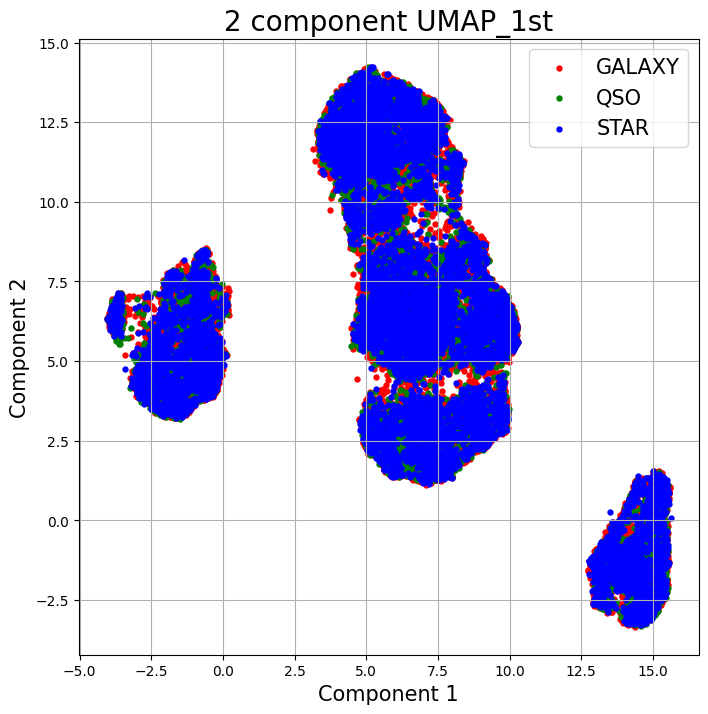

3


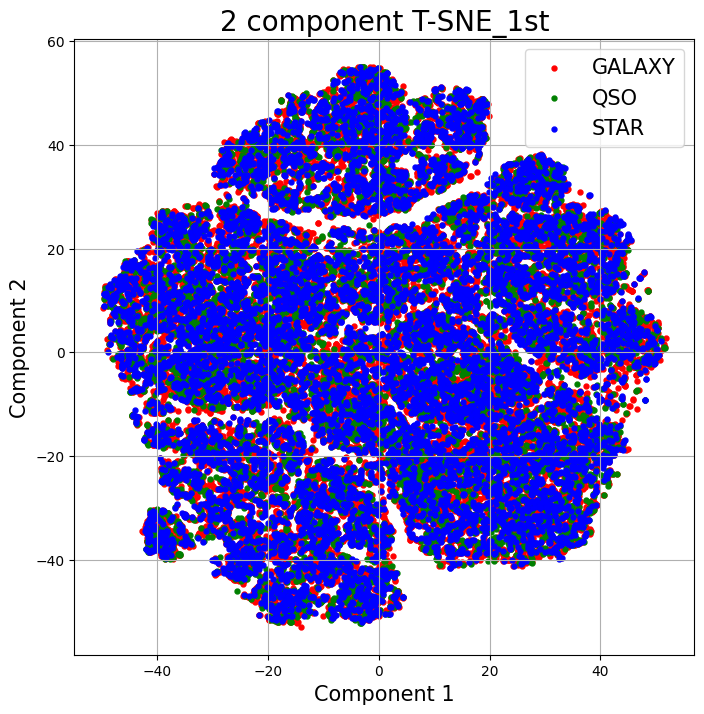

In [33]:
visualise_components('PCA_1st', y_train, finalPca)
visualise_components('UMAP_1st', y_train, finalUmapDf)
visualise_components('T-SNE_1st', y_train, finalTsneDf)